# Social Network Analysis

#### Submitted By:
    Shagun Bhardwaj (18csu202)

### Objectives
- To understand the graph theory and social network analysis using NetworkX

## Karate Club Network

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms import *
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [2]:
# Loading the network graph
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G,first_label=1)

### Graph Attributes

In [3]:
print("Is the network directed graph:",G.is_directed())
print("Is the network multigraph:",G.is_multigraph())
print("Is the network bipartite graph:",bipartite.is_bipartite(G))

Is the network directed graph: False
Is the network multigraph: False
Is the network bipartite graph: False


In [4]:
nodes = len(G.nodes)
edges = len(G.edges)

print("Number of nodes:",nodes)
print("Number of edges:",edges)

Number of nodes: 34
Number of edges: 78


### Visualization of network

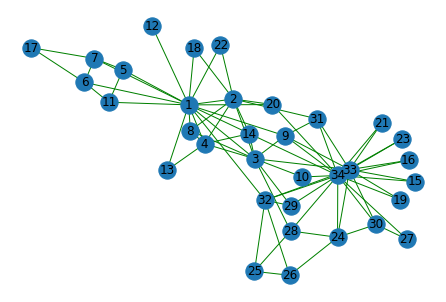

In [5]:
# Visualize the network
nx.draw(G, with_labels= True, pos = nx.spring_layout(G), edge_color='green')
plt.show()

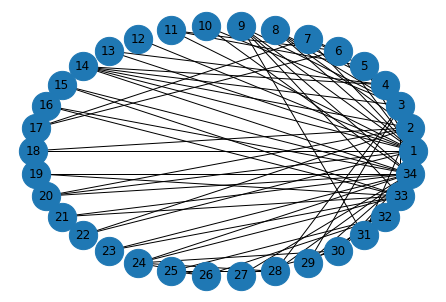

In [6]:
# Visualize the network
nx.draw(G, with_labels= True, pos = nx.circular_layout(G), node_size=800)
plt.show()

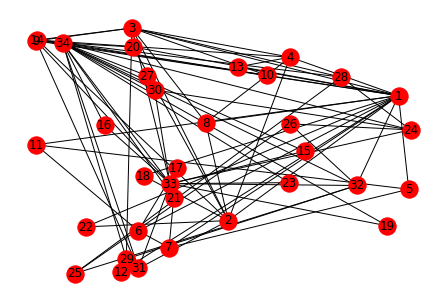

In [7]:
# Visualize the network
nx.draw(G, with_labels= True, pos = nx.random_layout(G), node_color='red')
plt.show()

### Degree of Nodes

In [8]:
# list the degree (neighbors) of each node in the graph
deg_seq = list(G.degree())
G.degree()

DegreeView({1: 16, 2: 9, 3: 10, 4: 6, 5: 3, 6: 4, 7: 4, 8: 4, 9: 5, 10: 2, 11: 3, 12: 1, 13: 2, 14: 5, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 5, 25: 3, 26: 3, 27: 2, 28: 4, 29: 3, 30: 4, 31: 4, 32: 6, 33: 12, 34: 17})

In [9]:
max_deg = np.max(np.array(deg_seq)[:,1])
min_deg = np.min(np.array(deg_seq)[:,1])
avg_deg = np.mean(np.array(deg_seq)[:,1])

print("Maximum degree in the network:",max_deg)
print("Minimum degree in the network:",min_deg)
print("Average degree in the network:",avg_deg)

Maximum degree in the network: 17
Minimum degree in the network: 1
Average degree in the network: 4.588235294117647


### Clustering Coefficients

__Local clustering coefficient of a node:__ Fraction of pairs of the node’s friends that are friends with each other.

In [10]:
print("The local clustering coefficient of node 1 is", nx.clustering(G, 1))
print("The local clustering coefficient of node 12 is", nx.clustering(G, 12))
print("The local clustering coefficient of node 24 is", nx.clustering(G, 24))
print("The local clustering coefficient of node 34 is", nx.clustering(G, 34))

The local clustering coefficient of node 1 is 0.15
The local clustering coefficient of node 12 is 0
The local clustering coefficient of node 24 is 0.4
The local clustering coefficient of node 34 is 0.11029411764705882


__Global Clustering Coefficient__
* Average local clustering coefficient over all nodes in the graph.
* Transitivity: Ratio of number of triangles and number of “open triads”.

In [11]:
print("The average clustering coefficient of the network is", nx.average_clustering(G))

The average clustering coefficient of the network is 0.5706384782076823


In [12]:
print("The transitivity of the network is", nx.transitivity(G))

The transitivity of the network is 0.2556818181818182


__Distance and Path__
* Distance between two nodes: the length of the shortest path between them. 
* Path: A sequence of nodes connected by an edge.

In [13]:
print("The shortest path between nodes 2 and 16 is", nx.shortest_path(G, 2, 16))

The shortest path between nodes 2 and 16 is [2, 3, 33, 16]


In [14]:
print("The shortest distance between nodes 2 and 16 is", nx.shortest_path_length(G, 2, 16))

The shortest distance between nodes 2 and 16 is 3


__Breadth First Search__

In [15]:
# Breadth First Search to find path in network
T = nx.bfs_tree(G, 1)

In [16]:
# Edges in BFS tree
T.edges

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 31), (3, 10), (3, 28), (3, 29), (3, 33), (6, 17), (9, 34), (32, 25), (32, 26), (28, 24), (33, 15), (33, 16), (33, 19), (33, 21), (33, 23), (33, 30), (34, 27)])

In [17]:
print("The shortest distance from node 1 to all the other nodes is", nx.shortest_path_length(G, 1))

The shortest distance from node 1 to all the other nodes is {1: 0, 32: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1, 12: 1, 13: 1, 14: 1, 18: 1, 20: 1, 22: 1, 10: 2, 17: 2, 25: 2, 26: 2, 28: 2, 29: 2, 31: 2, 33: 2, 34: 2, 15: 3, 16: 3, 19: 3, 21: 3, 23: 3, 24: 3, 27: 3, 30: 3}


__Distance Measures__
* average distance
* diameter
* eccentricity
* radius
* periphery
* center

In [18]:
print("The average distance between every pair of nodes is", nx.average_shortest_path_length(G))

The average distance between every pair of nodes is 2.408199643493761


In [19]:
print("The maximum distance (diameter) between any pair of nodes is", nx.diameter(G))

The maximum distance (diameter) between any pair of nodes is 5


In [20]:
print("The eccentricity of nodes in network is", nx.eccentricity(G))

The eccentricity of nodes in network is {1: 3, 2: 3, 3: 3, 4: 3, 5: 4, 6: 4, 7: 4, 8: 4, 9: 3, 10: 4, 11: 4, 12: 4, 13: 4, 14: 3, 15: 5, 16: 5, 17: 5, 18: 4, 19: 5, 20: 3, 21: 5, 22: 4, 23: 5, 24: 5, 25: 4, 26: 4, 27: 5, 28: 4, 29: 4, 30: 5, 31: 4, 32: 3, 33: 4, 34: 4}


In [21]:
print("The radius of the network is", nx.radius(G))

The radius of the network is 3


In [22]:
print("The periphery nodes in the network:", nx.periphery(G))

The periphery nodes in the network: [15, 16, 17, 19, 21, 23, 24, 27, 30]


In [23]:
print("The centeral nodes of the network are", nx.center(G))

The centeral nodes of the network are [1, 2, 3, 4, 9, 14, 20, 32]


### Connectivity of Graph

In [24]:
# check if graph is connected
print("The network is connected:", nx.is_connected(G))

The network is connected: True


In [25]:
# number of graph components
print("The no. of connected components in the network is", nx.number_connected_components(G))

The no. of connected components in the network is 1


### Disconnecting a Graph

In [26]:
print("The mininmum number of nodes that will disconnect the network is", nx.node_connectivity(G))

The mininmum number of nodes that will disconnect the network is 1


In [27]:
print("The node that will disconnect the network is", nx.minimum_node_cut(G))

The node that will disconnect the network is {1}


In [28]:
print("The mininmum number of edges that will disconnect the network is", nx.edge_connectivity(G))

The mininmum number of edges that will disconnect the network is 1


In [29]:
print("The edge that will disconnect the network is", nx.minimum_edge_cut(G))

The edge that will disconnect the network is {(12, 1)}


NOTE:
* Graphs with large node and edge connectivity are more robust to the loss of nodes and edges.

### Node Connectivity

In [30]:
print("The mininmum number of nodes that will disconnect node 15 and 4 is", nx.node_connectivity(G, 15, 4))

The mininmum number of nodes that will disconnect node 15 and 4 is 2


In [31]:
print("The node that will disconnect node 15 and 4 is", nx.minimum_node_cut(G, 15, 4))

The node that will disconnect node 15 and 4 is {33, 34}


### Edge Connectivity

In [32]:
print("The mininmum number of edges that will disconnect node 15 and 4 is", nx.edge_connectivity(G, 15, 4))

The mininmum number of edges that will disconnect node 15 and 4 is 2


In [33]:
print("The edge that will disconnect node 15 and 4 is", nx.minimum_edge_cut(G, 15, 4))

The edge that will disconnect node 15 and 4 is {(15, 34), (15, 33)}


### Network Centrality Measures
* Degree centrality
* Closeness centrality
* Betweenness centrality

In [34]:
deg_cent = nx.degree_centrality(G)
deg_cent_sort = sorted(deg_cent.items(), key=operator.itemgetter(1), reverse = True)[0:5]

print("The degree of centrality of node 1 is", deg_cent_sort)

The degree of centrality of node 1 is [(34, 0.5151515151515151), (1, 0.48484848484848486), (33, 0.36363636363636365), (3, 0.30303030303030304), (2, 0.2727272727272727)]


In [35]:
close_cent = nx.closeness_centrality(G)
close_cent_sort = sorted(close_cent.items(), key=operator.itemgetter(1), reverse = True)[0:5]

print("The closeness centrality of node 1 is", close_cent_sort)

The closeness centrality of node 1 is [(1, 0.5689655172413793), (3, 0.559322033898305), (34, 0.55), (32, 0.5409836065573771), (9, 0.515625)]


In [36]:
btwn_cent = nx.betweenness_centrality(G, normalized = True, endpoints = False)
btwn_cent_sort = sorted(btwn_cent.items(), key=operator.itemgetter(1), reverse = True)[0:5]
print("The betweenness centrality is", btwn_cent_sort)

The betweenness centrality is [(1, 0.43763528138528146), (34, 0.30407497594997596), (33, 0.145247113997114), (3, 0.14365680615680618), (32, 0.13827561327561325)]


* Centrality measures make different assumptions about what it means to be a “central” node. Thus, they produce different rankings.
* The best centrality measure depends on the context of the network one is analyzing.
* When identifying central nodes, it is usually best to use multiple centrality measures instead of relying on a single one. 